In [1]:
import colour
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
red_wavelength = 644
green_wavelength = 515 
blue_wavelength = 467.83
z = 1 
beta = 0.1
gamma = 1 / np.sqrt(1 - beta ** 2)

In [3]:
image_path = 'semaforo.jpg'
image = Image.open(image_path)
image = image.convert('RGB')
pixels = np.array(image)

height, width, _ = pixels.shape

red_channel = pixels[:, :, 0] 
green_channel = pixels[:, :, 1]
blue_channel = pixels[:, :, 2]

C:\Users\julia\AppData\Local\Temp\ipykernel_8380\1789521415.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y, THETA * 180 / np.pi, shading='auto', cmap='viridis')


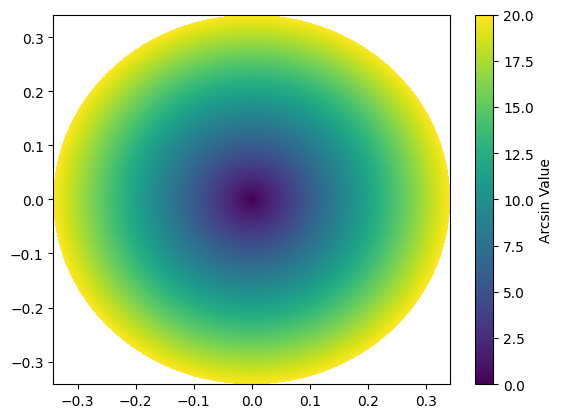

In [4]:
alpha = 20 * np.pi / 180
theta = np.linspace(-alpha, alpha, width)
phi = np.linspace(0, 2*np.pi, height)
THETA, PHI = np.meshgrid(theta, phi)

X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)

THETA = np.arcsin(np.sqrt(X**2 + Y**2))
plt.pcolormesh(X, Y, THETA * 180 / np.pi, shading='auto', cmap='viridis')
plt.colorbar(label="Arcsin Value")

In [5]:
def wavelength_to_rgb(wavelength, intensity):
    visible_wavelength = np.clip(wavelength, 360, 780)
    xyz = colour.wavelength_to_XYZ(visible_wavelength)
    rgb = colour.XYZ_to_sRGB(xyz)
    rgb = (intensity[:, :, np.newaxis] * rgb)
    rgb = rgb.astype(int)
    return rgb

def transform_wavelength(wavelength, theta):
    return wavelength / (gamma * (1 - beta * np.cos(theta)))

def transform_rgb(red_channel, green_channel, blue_channel, THETA):
    red_wavelength_trans = transform_wavelength(red_wavelength, THETA)
    green_wavelength_trans = transform_wavelength(green_wavelength, THETA)
    blue_wavelength_trans = transform_wavelength(blue_wavelength, THETA)

    red_channel_trans = wavelength_to_rgb(red_wavelength_trans, red_channel)
    green_channel_trans = wavelength_to_rgb(green_wavelength_trans, green_channel)
    blue_channel_trans = wavelength_to_rgb(blue_wavelength_trans, blue_channel)

    rgb_trans = np.clip(red_channel_trans + green_channel_trans + blue_channel_trans, 0, 255)
    return rgb_trans

In [62]:
red_wavelength_trans = transform_wavelength(red_wavelength, THETA)
red_channel_trans = wavelength_to_rgb(red_wavelength_trans, red_channel)
red_channel_trans.shape


(2851, 3801, 3)

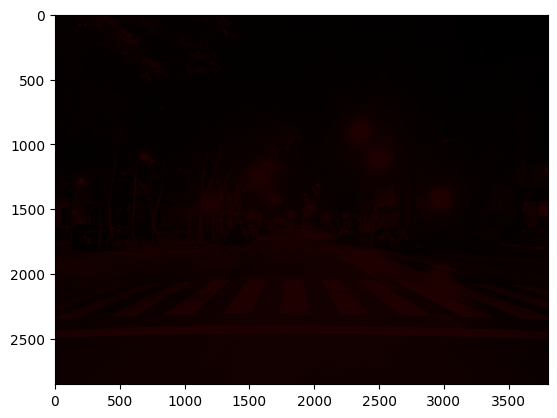

In [64]:
plt.imshow(red_channel_trans)

In [ ]:
transformed_pixels = transform_rgb(red_channel, green_channel, blue_channel, THETA)
#transformed_image = Image.fromarray(transformed_pixels)
plt.imshow(transformed_pixels)

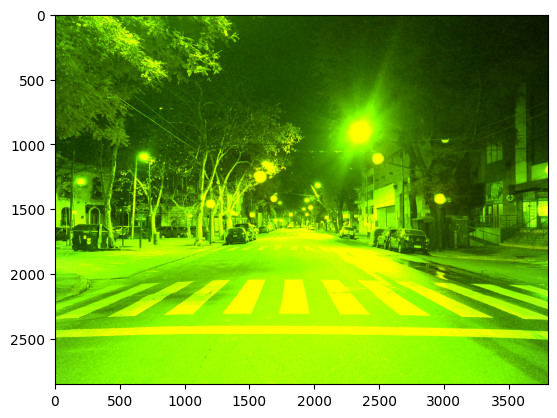

In [46]:
plt.imshow(transformed_pixels[0])

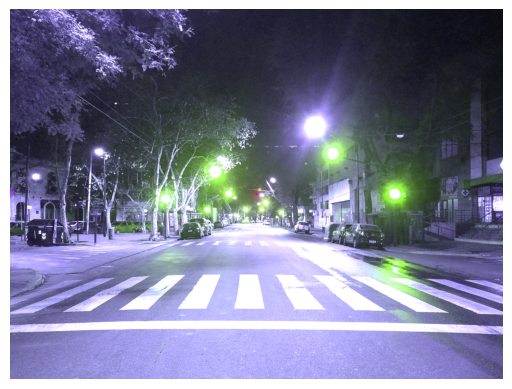

In [8]:

# Helper functions
def cartesian_to_spherical(x, y):
    return np.arctan(np.sqrt(x ** 2 + y ** 2) / z)

def wavelength_to_rgb(wavelength, intensity):
    visible_wavelength = np.clip(wavelength, 360, 780)
    xyz = colour.wavelength_to_XYZ(visible_wavelength)
    rgb = colour.XYZ_to_sRGB(xyz)
    rgb = (rgb.T * intensity).T 
    rgb = np.clip(rgb, 0, 255).astype(int)
    return rgb

def transform_wavelength(wavelength, theta):
    return wavelength / (gamma * (1 - beta * np.cos(theta)))

def transform_rgb(red_intensity, green_intensity, blue_intensity, theta):
    red_wavelength_trans = transform_wavelength(red_wavelength, theta)
    green_wavelength_trans = transform_wavelength(green_wavelength, theta)
    blue_wavelength_trans = transform_wavelength(blue_wavelength, theta)

    red_rgb_trans = wavelength_to_rgb(red_wavelength_trans, red_intensity)
    green_rgb_trans = wavelength_to_rgb(green_wavelength_trans, green_intensity)
    blue_rgb_trans = wavelength_to_rgb(blue_wavelength_trans, blue_intensity)

    rgb_trans = np.clip(red_rgb_trans + green_rgb_trans + blue_rgb_trans, 0, 255)
    return rgb_trans

In [ ]:
image_path = 'semaforo.jpg'
image = Image.open(image_path)
image = image.convert('RGB')
pixels = np.array(image)

height, width, _ = pixels.shape

# Precompute theta values
x_coords = np.arange(-width//2, width//2)
y_coords = np.arange(-height//2, height//2)
x_grid, y_grid = np.meshgrid(x_coords, y_coords)
theta_grid = cartesian_to_spherical(x_grid, y_grid)

# Extract individual color channels
red_channel = pixels[:, :, 0] 
green_channel = pixels[:, :, 1]
blue_channel = pixels[:, :, 2]

# Vectorized transformation
transformed_pixels = np.zeros((height, width, 3), dtype=np.uint8)
for i in range(height):
    transformed_rgb = transform_rgb(red_channel[i, :], green_channel[i, :], blue_channel[i, :], theta_grid[i, :])
    transformed_pixels[i, :, :] = transformed_rgb

# Display transformed image
transformed_image = Image.fromarray(transformed_pixels)
plt.imshow(transformed_image)
plt.axis('off')
plt.show()


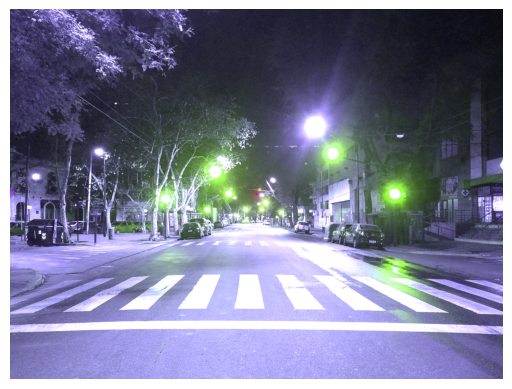

In [9]:
transformed_image = Image.fromarray(transformed_pixels)
plt.imshow(transformed_image)
plt.axis('off')
plt.savefig('semaforoverde.jpg')

In [11]:
transformed_image
